In [1]:
import numpy as np
import scipy.linalg as linalg
from sklearn.datasets import *
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.svm as svm

/home/ma/bin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ma/bin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ma/bin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
np.random.seed(0)

In [6]:
X, Y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2)

In [7]:
iy = (Y==1)
iny = (Y==0)

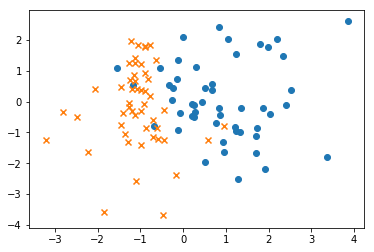

In [9]:
plt.scatter(X[iy,0],X[iy,1], marker='o')
plt.scatter(X[iny,0],X[iny,1], marker='x')


In [10]:
clf = svm.SVC(kernel='linear', C=1.0)

In [11]:
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
xx, yy = np.meshgrid(np.linspace(-3,3,500), np.linspace(-3,3,500))



In [14]:
Z = clf.decision_function(np.c_[xx.ravel, yy.ravel])
Z = Z.reshape(xx.shape)

TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'

In [15]:
np.random.seed(1000)

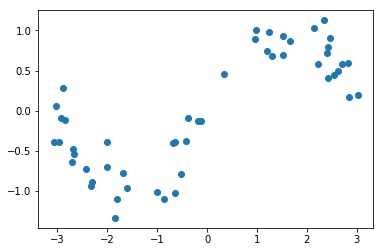

In [16]:
n = 50
x = np.sort(np.random.uniform(-np.pi, np.pi, n))
y = np.sin(x) + np.random.randn(n)*0.2
plt.plot(x,y, 'o')

In [17]:
svr_rbf = svm.SVR(kernel='rbf', C=1000, gamma=0.1)
svr_lin = svm.SVR(kernel='linear', C=1000)
svr_poly = svm.SVR(kernel='poly', C=1000, degree=3)

In [19]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [20]:
y_rbf = svr_rbf.fit(x,y).predict(x)
y_lin = svr_lin.fit(x,y).predict(x)
y_poly = svr_poly.fit(x,y).predict(x)

/home/ma/bin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ma/bin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ma/bin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ma/bin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account b

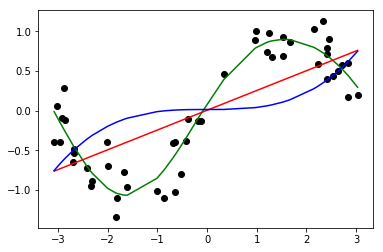

In [22]:
plt.scatter(x, y, c='k', label='data')
plt.plot(x, y_rbf, c='g', label='RBF model')
plt.plot(x, y_lin, c='r', label='Linear model')
plt.plot(x, y_poly, c='b', label='Polynominal')

In [24]:
print("R2(pred)-rbf: %f" % svm.SVR.score(svr_rbf, x,y))
print("R2(pred)-lin: %f" % svm.SVR.score(svr_lin, x,y))
print("R2(pred)-poly: %f" % svm.SVR.score(svr_poly, x,y))

R2(pred)-rbf: 0.899732
R2(pred)-lin: 0.551171
R2(pred)-poly: 0.260095
